In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df = pd.read_csv('https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/refs/heads/main/Dataset/Mall_Customers.csv')
print("Shape of the data= ", df.shape)
df.head()

Shape of the data=  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Unlabelled Mall Customer Data')

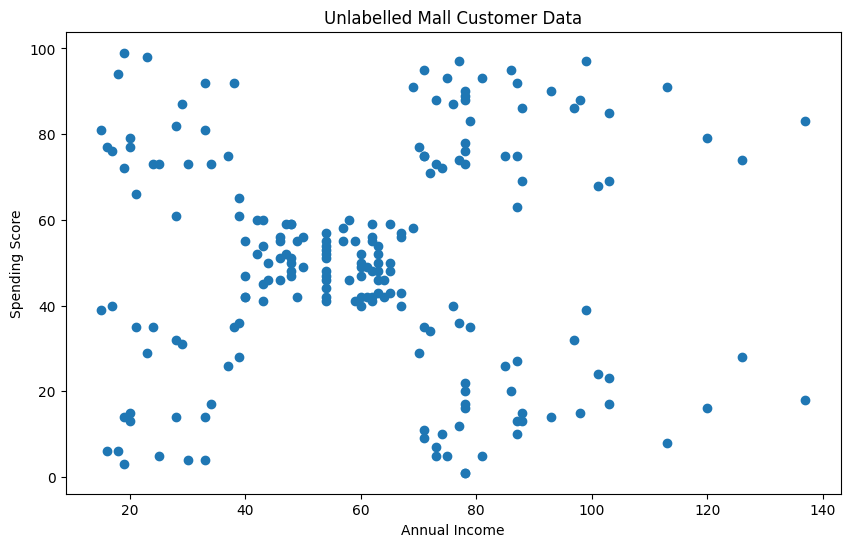

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Unlabelled Mall Customer Data')

In [16]:
df=df.dropna()

In [17]:
X = df.iloc[:, [2,3]].values
X[:5]

array([[19, 15],
       [21, 15],
       [20, 16],
       [23, 16],
       [31, 17]])

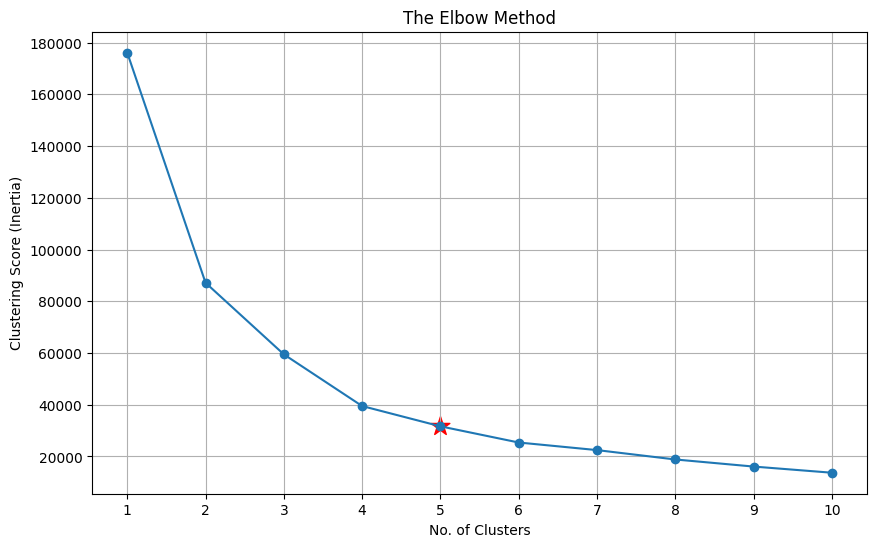

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

clustering_score = []

# Range for number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', random_state=42)
    kmeans.fit(X)  # X is your dataset
    clustering_score.append(kmeans.inertia_)  # Inertia for the current cluster count

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), clustering_score, marker='o')
plt.scatter(5, clustering_score[4], s=200, c='red', marker='*')  # Highlighting the chosen cluster count
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score (Inertia)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()


In [19]:
from sklearn.cluster import KMeans

# Initialize KMeans with 5 clusters and a random state for reproducibility
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans model to the dataset
kmeans.fit(X)

# Compute the cluster centers
cluster_centers = kmeans.cluster_centers_

# Predict the cluster index for each sample in the dataset
pred = kmeans.predict(X)

# Display the predicted cluster indices
pred


array([2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [20]:
import pandas as pd

# Assuming df is your DataFrame containing the original data
# Assign the cluster predictions to a new column in the DataFrame
df['Cluster'] = pred  # Add cluster predictions to the DataFrame

# Count the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts()

# Print the number of data points in each cluster
print('Number of data points in each cluster:\n', cluster_counts)
df.head()

Number of data points in each cluster:
 Cluster
1    72
2    42
0    42
3    24
4    20
Name: count, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [21]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')


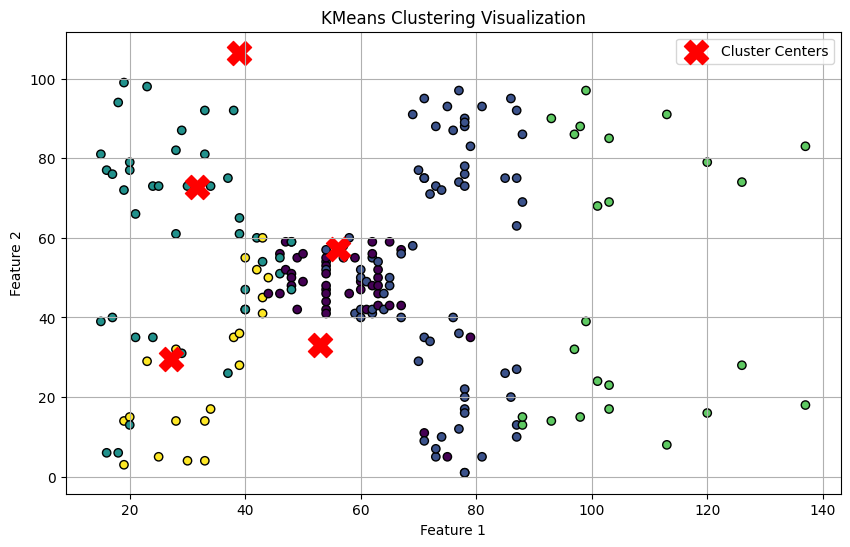

In [22]:
import matplotlib.pyplot as plt

# Assuming df has two features 'Feature1' and 'Feature2'
plt.figure(figsize=(10, 6))

# Scatter plot of the data points, colored by cluster
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X', label='Cluster Centers')

plt.title('KMeans Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()
